## 作业2：ADAMS和RK4数值积分的实现
仿照run_euler函数的实现，在modsim中实现Adams和四阶Runge-Kutta法，并使用炮弹发射仿真比较Euler、Adams和RK4三种数值积分的精度。实现run_adams和run_rk4函数。

In [47]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

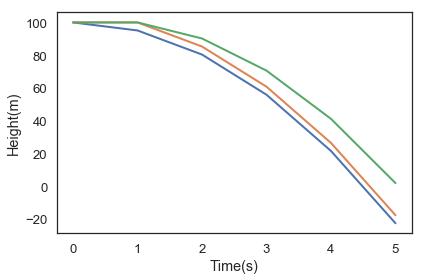

In [48]:

g=9.8
def f(xn,yn):
    return -g*xn
def run_rk4(xn,yn,h):
    k1=f(xn,yn)
    k2=f(xn+1/2*h,yn+1/2*h*k1)
    k3=f(xn+1/2*h,yn+1/2*h*k2)
    k4=f(xn+h,yn+h*k3)
    xn_1=xn+h
    yn_1=yn+h/6*(k1+2*k2+2*k3+k4)
    return xn_1,yn_1
h=1
x=[0]
y=[100]
x0=0
y0=100
for i in range(5):
    x0,y0=run_rk4(x0,y0,h)
    x.append(x0)
    y.append(y0)

plot(x, y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')


def f(xn,un):
    return -g*un
def run_adams(x0,u0,x1,u1,h):
    xn_1=x1+h/2*(3*f(x1,u1)-f(x0,u0))
    un_1=u1+h
    return xn_1,un_1
h=1
#第一个点
x0=100
u0=0
#第二个点
x1=100
u1=h
x=[100,100]
u=[0,h]

for i in range(4):
    x2,u2=run_adams(x0,u0,x1,u1,h)
    x0,u0=x1,u1
    x1,u1=x2,u2
    x.append(x1)
    u.append(u1)

plot(u, x)
m = UNITS.meter
s = UNITS.second

g = 9.8 * m/s**2

init_z = State(y=100.0 * m, v=0.0 * m/s)
init_x = State(y=0.0 * m, v=500.0 * m/s)

t_end = 5 * s
dt = 1 * s

system_z = System(init=init_z, g=g, t_end=t_end, dt=dt)
system_x = System(init=init_x, t_end=t_end, dt=dt)

def slope_func_z(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0 * m/s**2
    
    return dydt, dvdt

Vz, Az = slope_func_z(system_z.init, 0, system_z)
Vx, Ax = slope_func_x(system_x.init, 0, system_x)



results_z, details_z = run_euler(system_z, slope_func_z)
results_x, details_x = run_euler(system_x, slope_func_x)

plot(results_z.y)

decorate(xlabel='Time(s)',
         ylabel='Height(m)')

